In [1]:
#Tal vez este demás, pero haremos una funcion para obtener el ultimo elemento de un arreglo, esto simplificará la notacion en la funcion del metodo de Euler

function last(A)
   return A[length(A)] 
end


last (generic function with 1 method)



##  Ejercicio 1: Implementa el método de Euler en Julia. 

Debe ser de la forma metodo_euler(f,x0,t0,tf,h). No olvide que no debe de utilizar SymPy (Thank god, SymPy is for losers) de ningún modo en este ejercicio. Naturalmente la función f es de dos variables. El output de la función debe ser return listt,listx. Otra forma quizá más inteligente de implementarlo es definir desde antes listt, y que los inputs del método sean de la forma: metodo_euler(f,x0,listt), naturalmente en listt va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.

In [17]:
function metodoEuler(derivada::Function,x0,xf,y0,h)
    
    listaX = []
    listaY = []
    
    #Agreagamos los primeros elementos a las listas 
    
    push!(listaX,x0)
    push!(listaY,y0)
    
    #=Mientras no se llegue al ultimo elemento se seguiran agregando elementos a las listas. Aqui tambien se podria haber calculado el número de pasos para llegar a xf como n = (xf-x0)/h y luego implementado un for de 1 a n, pero en realidad, es lo mismo, y además si hacemos lo anterior hay que redondear a k al entero menor. i.e. debemos ocupar mas espacio para almacenar a n , y hacer mas operaciones de tiempo constante. =#
    
    while(last(listaX)<xf)
        
        push!(listaY,last(listaY) + derivada(last(listaX),last(listaY))*h)
        push!(listaX,last(listaX)+h)
    end
    
    return [listaX,listaY]
    
end

metodoEuler (generic function with 1 method)

**Pruebe su nuevo método resolviendo la ecuación: **$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$ con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [34]:
#=Ok se nos piden varias cosas, haremos una función que arroje todo. =#
using PyPlot
plt = PyPlot
function methodVerification(derivada::Function,solucion::Function,x0,xf,condicionesIniciales,pasos)
    
    eulerArreglo=[]
    xSolucion=[]
    ySolucion=[]
    numPlot = 1
    numberOfPlots = length(condicionesIniciales)*length(pasos)
    
    for i in 1:length(condicionesIniciales)
        for j in 1:length(pasos)
            eulerArreglo = metodoEuler(derivada,x0,xf,condicionesIniciales[i],pasos[j])
            xSolucion = eulerArreglo[1]
            ySolucion = condicionesIniciales[i]*solucion.(xSolucion)
            
            plt.figure(figsize=(15, 20))
            plt.subplot(numberOfPlots,1,numPlot)
            plt.xlabel("x")
            plt.title("Euler cond. inicial: $(condicionesIniciales[i]) Paso: $(pasos[j])")
            plt.grid()
            plt.plot(eulerArreglo[1],eulerArreglo[2],color = "blue",label = "Aproximacion")
    
            #Gráfico de error
            plt.plot(xSolucion,ySolucion,color = "orange",label = "Solucion")
            legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    
            plt.show()
            numPlot+=1
        end 
    end 
end 

methodVerification (generic function with 1 method)

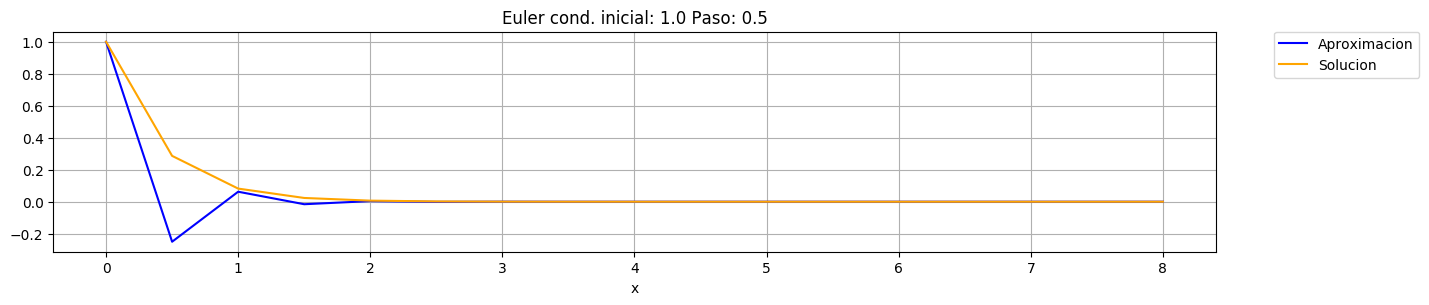

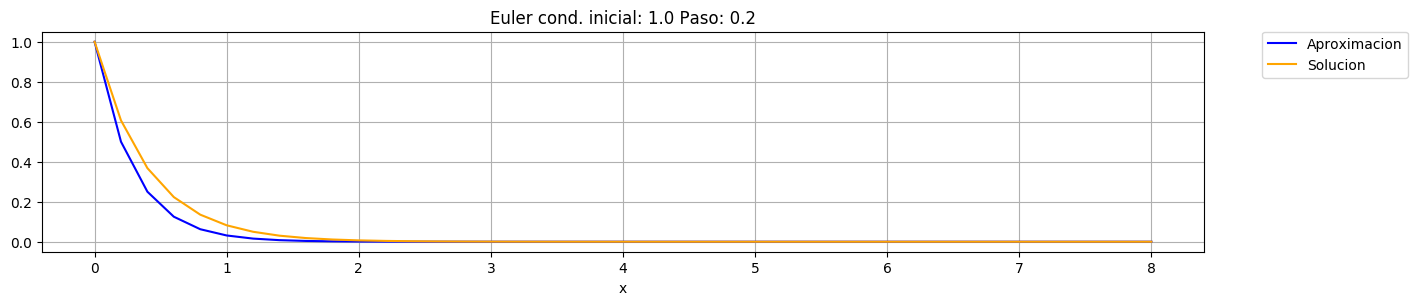

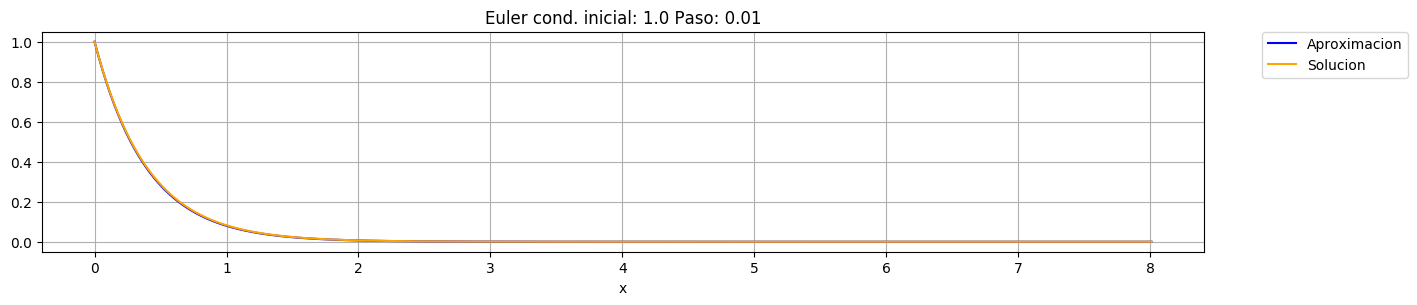

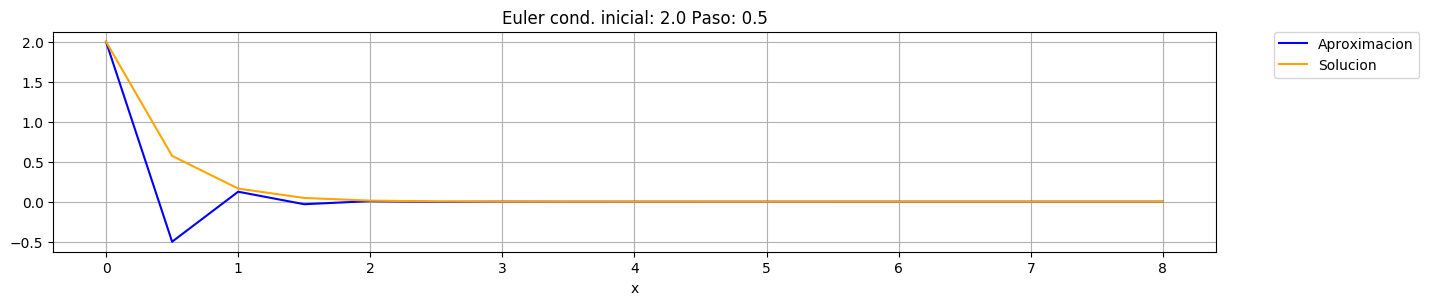

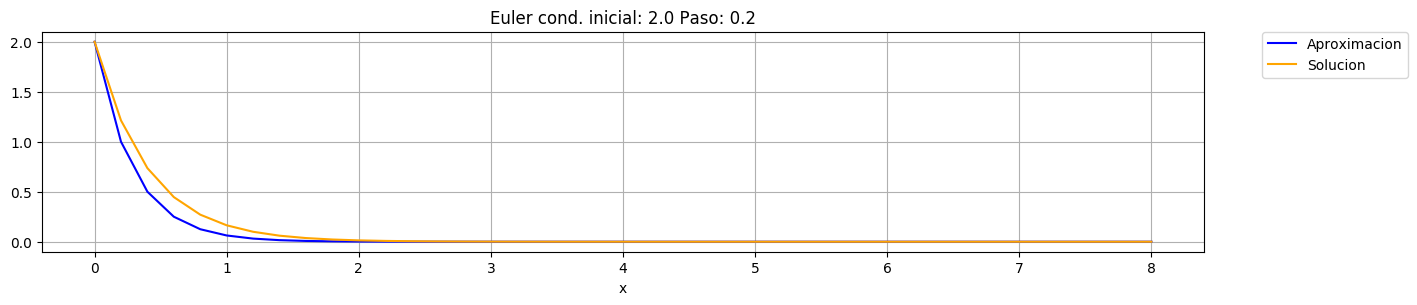

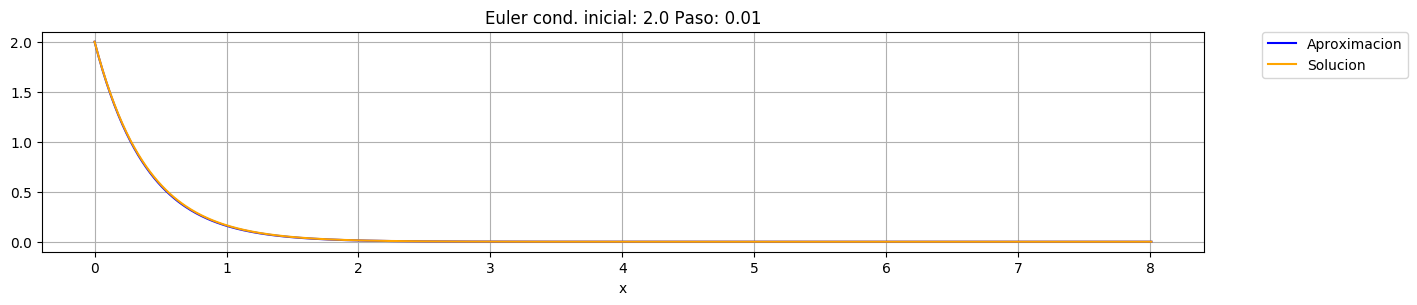

In [35]:
condicionesIniciales = [1.0,2.0]
pasos = [0.5,0.2,0.01]

methodVerification((x,y)->-2.5*y,x->e^(-2.5*x),0,8,condicionesIniciales,pasos)

Las unicas que nos faltarian son las de paso 1 que el profesor queria que hicieramos aparte por alguna razón. 
Vamos a llamar de nuevo a nuestra funcion methodVerification con paso 1. 

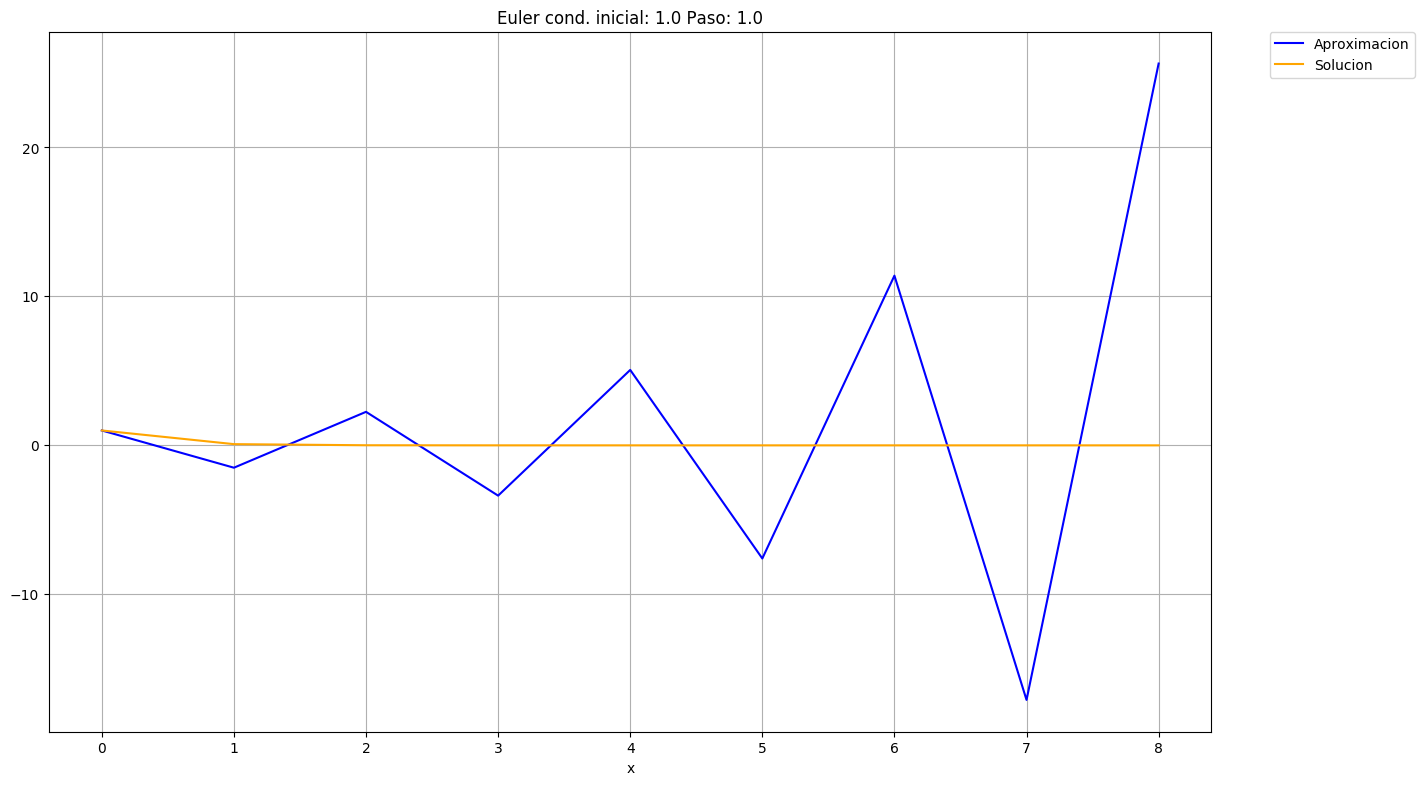

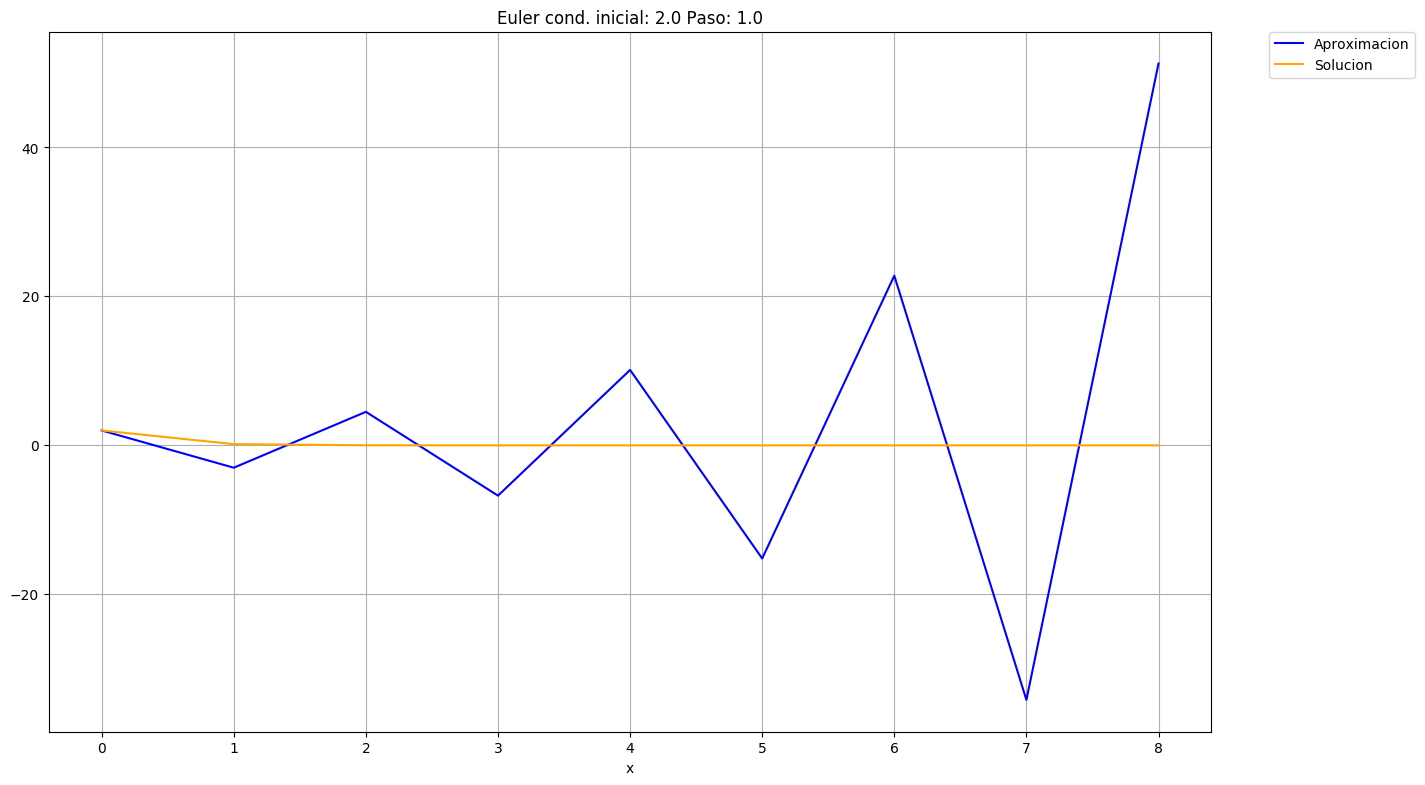

In [38]:
pasos = [1.0]
condicionesIniciales = [1.0,2.0]
methodVerification((x,y)->-2.5*y,x->e^(-2.5*x),0,8,condicionesIniciales,pasos)

## Ejercicio 2: ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$**

El sistema físico que modela dicha ecuación es el del oscilador armónico, el cual basicamente es un resorte al cual se sujeta un objeto de masa m. El objeto se elonga respecto a su posición inicial y se le suelta para que oscile. La fuerza que ejerce el resorte sobre la masa depende linealmente del estiramiento: $F = -kx$ (Ley de Hooke). Al utilizar la segunda ley de Newton Tenemos:

$$m\frac{d^2x}{dt^2} = -kx \to \frac{d^2 x}{dt^2} = \frac{-k}{m}x$$

Si la masa del objeto es uno obtenemos la relación que propone este ejercicio. 

Esta relación conduce a la siguiente ecuación diferencial homogenea de segundo orden:

$$\frac{d^2x}{dt^2} +kx = 0$$

Proponemos como solución una función de la forma $e^{rx}$; sustituyendo en la ecuación anterior se obtiene

$$(r^{2}+k)e^{rx} = 0$$

La exponencial nunca será cero, por lo que necesariamente:

$$r^2 +k = 0 \to r = \pm \sqrt{k}i$$

Tenemos dos soluciones $e^{\sqrt{k}it}$, $e^{-\sqrt{k}it}$. El campo vectorial de las soluciones posibles a la ecuación es el conjunto generado por dichas funciones, i.e. el conjunto de las combinaciones lineales de estas. Se deduce asi que cualquier solución puede escribirse de la siguiente forma:

$$x(t) = c_{1} e^{\sqrt{k}it} +c_{2} e^{-\sqrt{k}it}$$

o Usando la relación de euler (y despues de algunos reacomodos)

$$x(t) =A_{1}cos(\sqrt{k}t) +A_{2}sen(\sqrt{k}t)$$ 

## **Ejercicio 3: Haz $u = \dot{x}(t)$ y calcula la derivada de $u$ ¿qué obtienes y como se relaciona con el sistema original?**

Si hacemos $u = \frac{dx}{dt}$

Tenemos las siguientes dos ecuaciones. 

$$\frac{du}{dt} = \frac{d^2 x}{dt^2} = -kx $$

$$\frac{dx}{dt} = u$$

es decir, tenemos dos ecuaciones 

$$\frac{dx}{dt} = f_{1}(x,u,t)$$
$$\frac{du}{dt} = f_{2}(x,u,t)$$

y Podemos resolver el sistema numericamente en la siguiente forma: Suponga que se cuenta con las condiciones iniciales $u_{0}$,$x_{0}$ y $t_{0}$. Con Euler podemos aproximar los puntos $u({t_{0}+\Delta})$, $x(t_{0}+\Delta)$ de la forma usual:

$$t_{1} = t_{0}+\Delta$$
$$x_{1} = x_{0} +f_{1}(x_{0},u_{0},t_{0})\Delta$$
$$u_{1} = u_{0} +f_{2}(x_{0},u_{0},t_{0})\Delta$$

Continuamos dicho proceso, sacando las derivadas en el punto $(x_{k},u_{k},t_{k})$ y aproximando los puntos $k+1$-esimos de $u$ y $x$ a partir de estas:

$$t_{k+1} = t_{k}+\Delta$$
$$x_{k+1} = x_{k} +f_{1}(x_{k},u_{k},t_{k})\Delta$$
$$u_{k+11} = u_{k} +f_{2}(x_{k},u_{k},t_{k})\Delta$$

k va a ir desde 0, hasta $n = (b-a)/\Delta$ donde a y b son las cotas del intervalo [a,b] en el que se esta resolviendo la ecuación diferencial y $\Delta$ como es evidente de las formulas anteriores es el tamaño de paso. Prosigamos a implementar el método de Euler para un sistema como el anterior.  

## Ejercicio 4: Obten la solución del sistema $\ddot{x} = -kx(t)$ utilizando lo escrito arriba y el método de Euler.

In [42]:
function eulerSystem2(derivadas,t0,tf,condicionesIniciales,delta)
    
    soluciones = []
    tiempos = []
    
    for i in 1:2
        a = []
        push!(a,condicionesIniciales[i])
        push!(soluciones,a) 
    end
    push!(tiempos,t0)
    
    while(last(tiempos)<tf)
        push!(soluciones[1],last(soluciones[1]) +derivadas[1](last(soluciones[1]),last(soluciones[2]),last(tiempos))*delta)
        push!(soluciones[2],last(soluciones[2])+derivadas[2](soluciones[1][length(soluciones[1])-1],last(soluciones[2]),last(tiempos))*delta)
        
        push!(tiempos,last(tiempos)+delta)
    end
    
    return [tiempos,soluciones]
end

eulerSystem2 (generic function with 1 method)

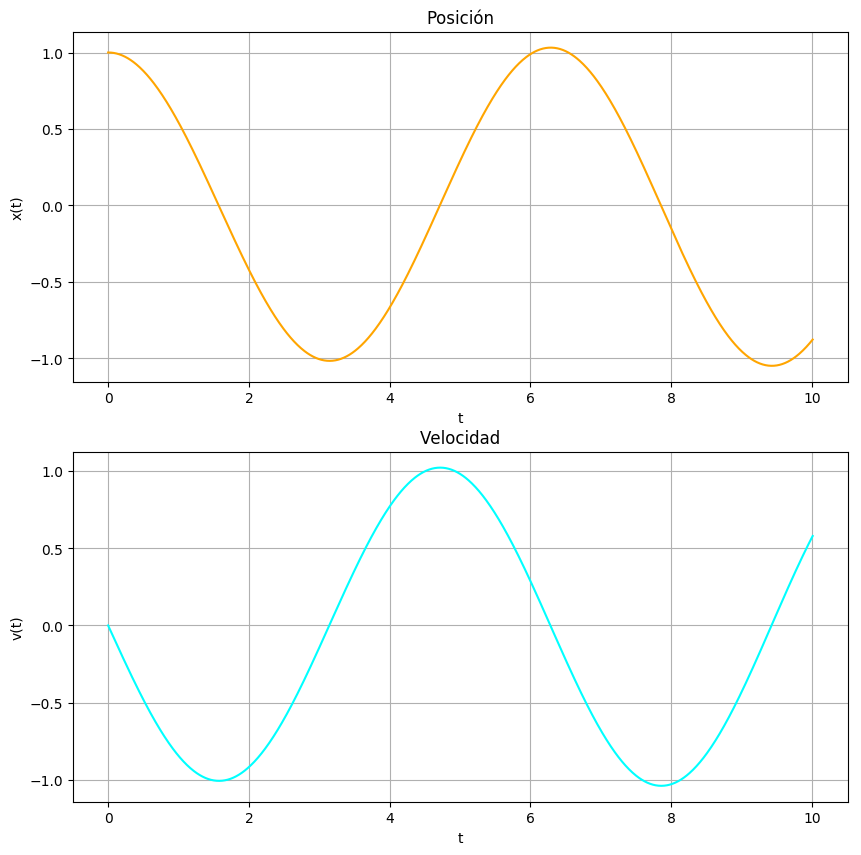

In [44]:
using PyPlot
plt = PyPlot

derivadas = [(x,u,t)->u,(x,u,t)->-x]
condicionesIniciales = [1,0]
#Aqui resolvemos el sistema con nuestra funcion
soluciones = eulerSystem2(derivadas,0,10,condicionesIniciales,0.01)
#Aqui graficamos
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Posición")
plt.grid()
plt.plot(soluciones[1],soluciones[2][1],color = "orange")

plt.subplot(2,1,2)
plt.xlabel("t")
plt.ylabel("v(t)")
plt.title("Velocidad")
plt.grid()
plt.plot(soluciones[1],soluciones[2][2],color = "cyan")
plt.show()





### Ejercicio 5: Aplicar el método de Euler para resolver la ecuación: $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$ Compare su respuesta con la solución exacta: $4+8t-5t^2$

Tenemos la función solución $x(t) = 4+8t-5t^2 $ De aqui podemos sacar la condicion inicial $x(0) = 4$, el intervalo que vamos a tomar de tiempo es de 0 a 5.

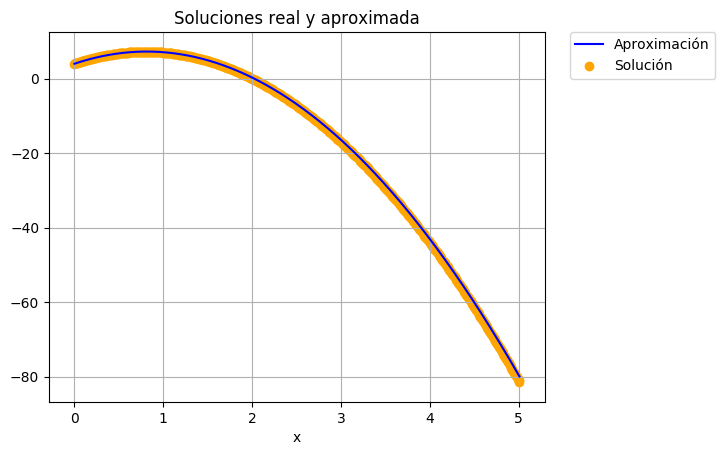

In [20]:
#aplicamos el metodo de euler 
using PyPlot
plt = PyPlot
solucionAprox = metodoEuler((t,x)->(2*x -18*t)/(1+t),0,5,4,0.01)
sol(t) = 4+8*t-5*t^2
puntosSolucionChida = sol.(solucionAprox[1])

    plt.figure("the plot")
    plt.xlabel("x")
    plt.title("Soluciones real y aproximada")
    plt.grid()
    plt.plot(solucionAprox[1],solucionAprox[2],color = "blue",label = "Aproximación")
    
    #Gráfico de error
    plt.scatter(solucionAprox[1],puntosSolucionChida,color = "orange",label = "Solución")
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    
    plt.show()
